# Detectron2: Zebrafish

## Install detectron2


In [13]:
import os

In [ ]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!gcc --version

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

In [ ]:
!git clone 

## Train on a custom dataset

In [1]:
#General
import os
import numpy as np

# custom code
from zebrafish.configs import get_default_instance_segmentation_config, load_config
from zebrafish.dataset import register_datasets, load_all_image_in_dataset
from zebrafish.evaluation import coco_evaluation, coco_evaluation_all_model
from zebrafish.model import predict
from zebrafish.trainers import TrainingUtil
from zebrafish.visualization import plot_prediction, plot_train_vs_validation_loss, plot_segementation, plot_segementation_vs_real
from zebrafish.utils import is_in_main_dir

#detectron
from detectron2.utils.logger import setup_logger


setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")

assert is_in_main_dir(), "The notebook expectes you to be in the main directory"

register_datasets("dataset")

In [2]:
max_iter = 1000
use_direction_classes = False

# Create a new model
cfg = get_default_instance_segmentation_config(
    use_direction_classes,
    max_iter=max_iter,
)

# Loads an old model
# cfg = load_config(path_to_model) # load cfg from disk
# use_direction_classes = cfg.DATASETS.USE_DIRECTION_CLASSES # load use_direction_classes from disk

In [3]:
cfg.SOLVER.MAX_ITER = max_iter

In [4]:
resume = True # Set to true if want to continue training where use left off.
TrainingUtil.train(cfg, resume=resume)

[05/25 21:57:20 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[05/25 21:57:20 d2.data.build]: Removed 0 images with no usable annotations. 5 images left.
[05/25 21:57:20 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
| zebra_fish | 69           |
|            |              |
[05/25 21:57:20 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/25 21:57:20 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/25 21:57:20 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[05/25 21:57:20 d2.data.build]: Using training sampler TrainingSampler
[05/25 21:57:20 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[05/25 21:57:20 d2.data.common]: Serializing 5 elements to byte tensors

[05/25 21:58:22 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_25_21_57_16/inference/coco_instances_results.json
[05/25 21:58:22 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.608
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.921
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.777
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.764
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.577
 Average Recall     (AR) @[ IoU=0.50:0.95 |

## Learning curve

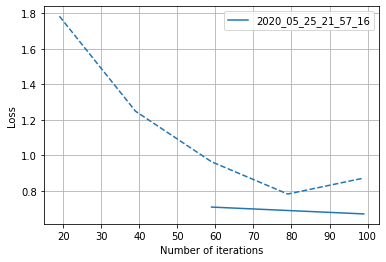

In [5]:
plot_train_vs_validation_loss([cfg.OUTPUT_DIR], show_training_loss=True)

## Evaluation

In [6]:
coco_evaluation(cfg, dataset_name="test")


WARNING [05/25 21:58:23 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'test_without_direction'. Trying to convert it to COCO format ...
[05/25 21:58:23 d2.data.datasets.coco]: Converting dataset annotations in 'test_without_direction' to COCO format ...)
[05/25 21:58:24 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[05/25 21:58:24 d2.data.datasets.coco]: Conversion finished, num images: 5, num annotations: 69
[05/25 21:58:24 d2.data.datasets.coco]: Caching annotations in COCO format: /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_25_21_57_16/test_without_direction_coco_format.json
[05/25 21:58:24 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/25 21:58:24 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_25_21_57_16/coco_instances_results.json
[05/25 21:58:24 d2.evaluation.coco_evaluation]: Evaluating predictio

OrderedDict([('bbox',
              {'AP': nan,
               'AP50': nan,
               'AP75': nan,
               'APs': nan,
               'APm': nan,
               'APl': nan}),
             ('segm',
              {'AP': nan,
               'AP50': nan,
               'AP75': nan,
               'APs': nan,
               'APm': nan,
               'APl': nan})])

## Evaluation against other models

In [7]:
bbox_df, segm_df = coco_evaluation_all_model("test")

[05/25 21:58:26 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/25 21:58:26 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_25_21_57_16/coco_instances_results.json
[05/25 21:58:26 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.608
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.921
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.777
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.764
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

[05/25 21:58:30 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 21:58:30 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category   | AP     | category   | AP     | category   | AP     |
|:-----------|:-------|:-----------|:-------|:-----------|:-------|
| N          | 77.298 | NE         | 69.488 | E          | 81.347 |
| SE         | 83.861 | S          | 86.416 | SW         | 53.216 |
| W          | 85.461 | NW         | 77.525 |            |        |
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.686
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.951
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.823
 Average Precision  (AP) @[ IoU=0.50:0.95 | ar

In [8]:
bbox_df

,model,AP,AP50,AP75,APs,APm,APl
0,output/2020_05_24_21_44_41,60.831611,92.079208,77.681730,NaN,76.435644,57.702273
1,output/2020_05_24_21_44_41,56.977904,95.034727,66.030804,NaN,69.207921,54.200038
2,output/2020_05_24_21_44_41,76.826626,97.524752,93.301361,NaN,90.816832,75.273436


In [9]:
segm_df

,model,AP,AP50,AP75,APs,APm,APl
0,output/2020_05_24_21_44_41,44.236477,86.900878,38.333930,NaN,57.604655,41.413945
1,output/2020_05_24_21_44_41,47.895313,93.984398,45.690790,NaN,61.057320,45.189191
2,output/2020_05_24_21_44_41,68.556789,95.080446,82.287541,NaN,79.937058,68.015058


## Tensorboard

In [12]:
%tensorboard --logdir output

UsageError: Line magic function `%tensorboard` not found.


## Visualization
Here we display the prediction for the unseen test set.

In [10]:
threshold = 0.75
n_images = 10
dataset = "test"

images = load_all_image_in_dataset(dataset, cfg)[:n_images]
predictions = predict(cfg, images, threshold=threshold)

### Prediction

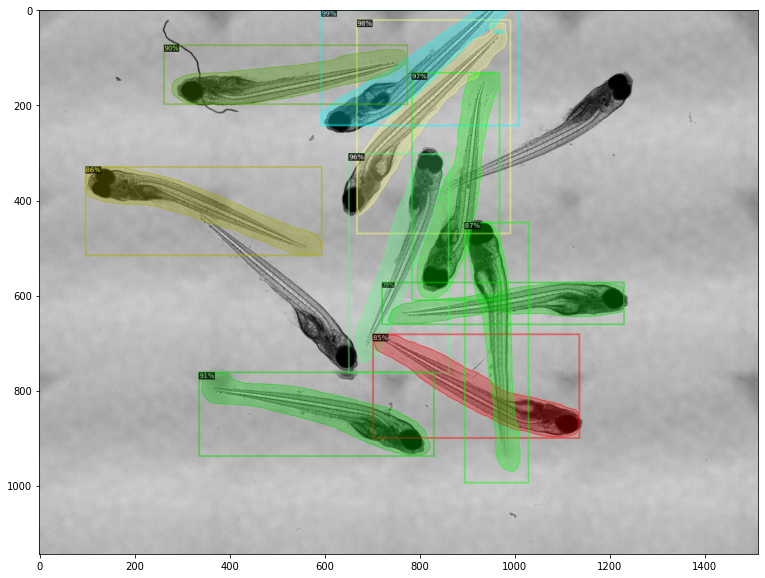

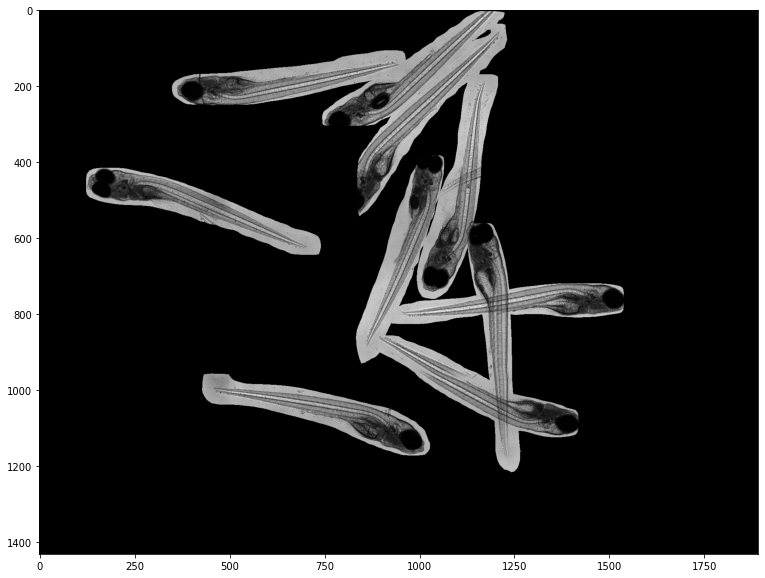

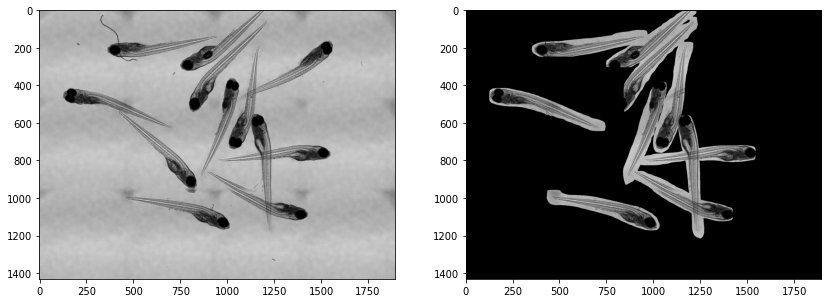

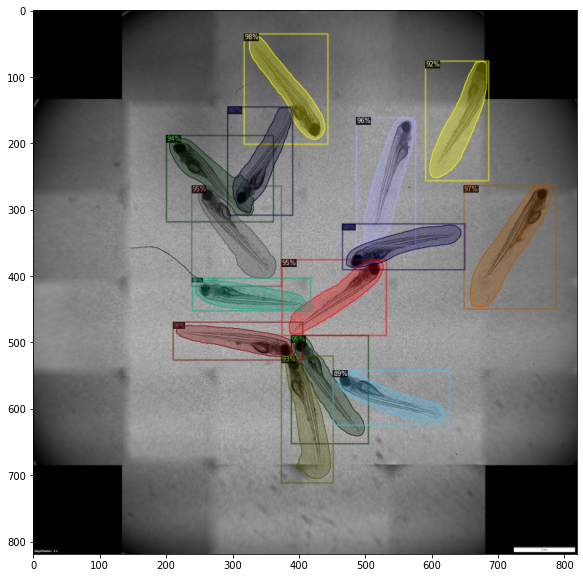

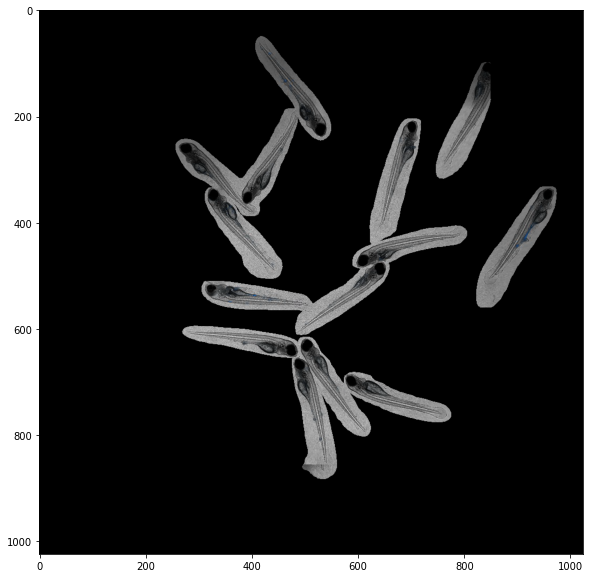

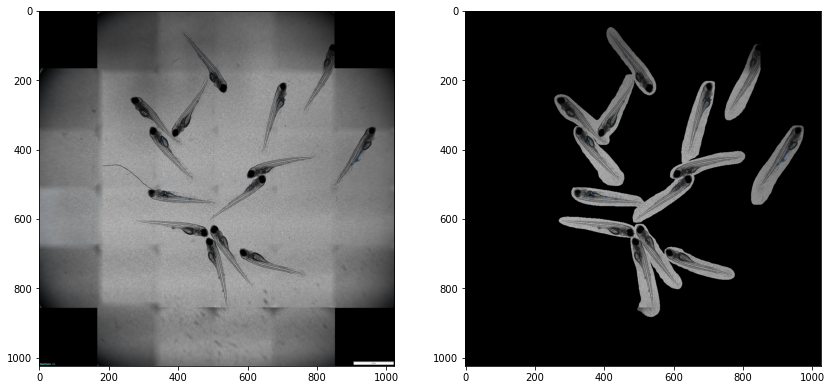

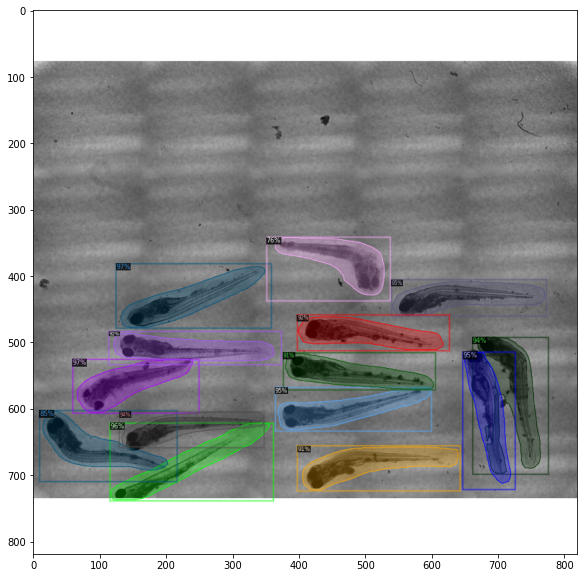

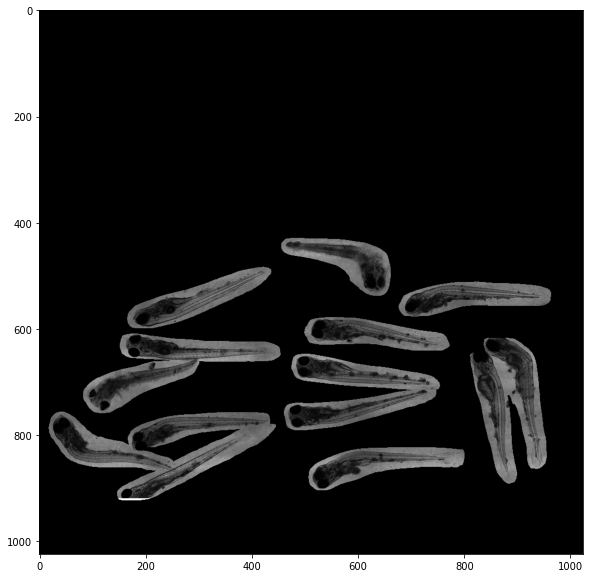

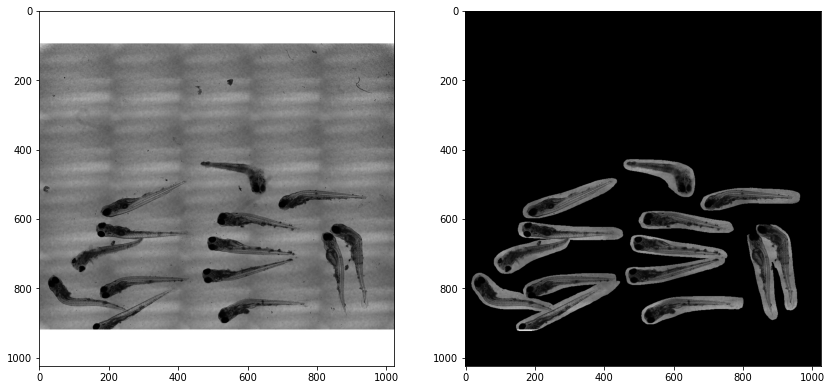

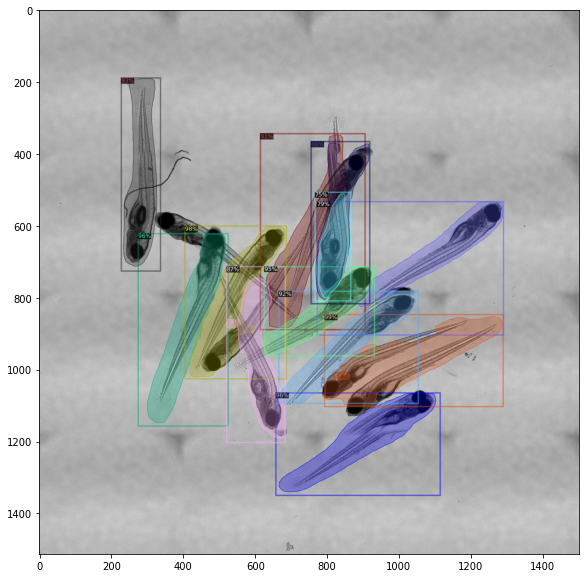

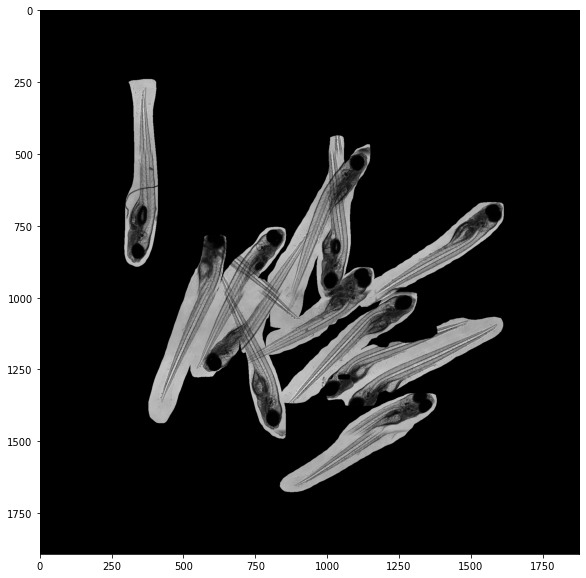

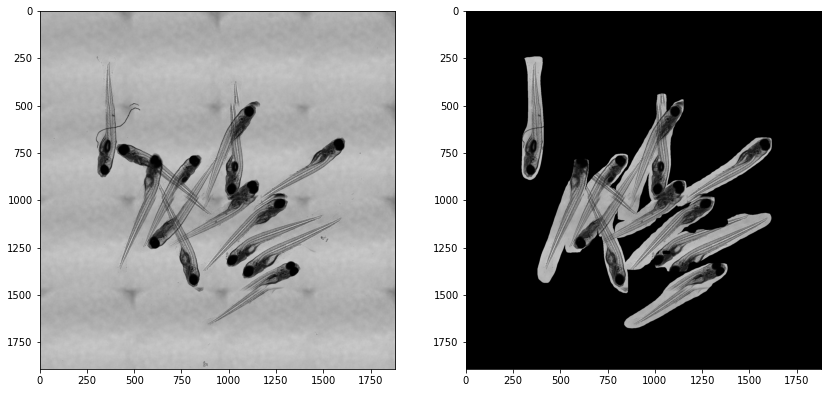

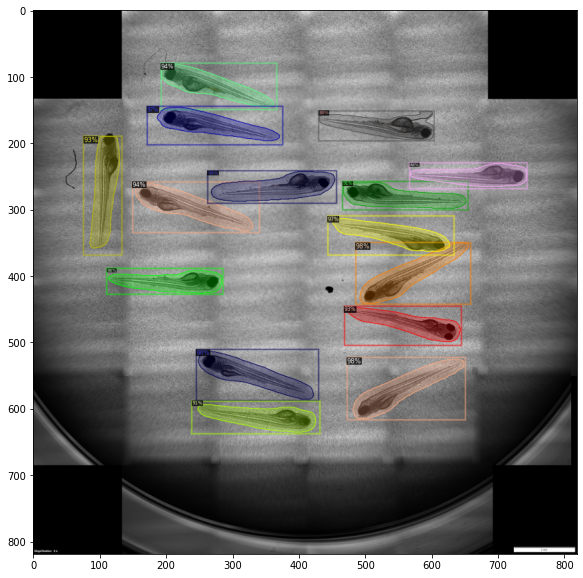

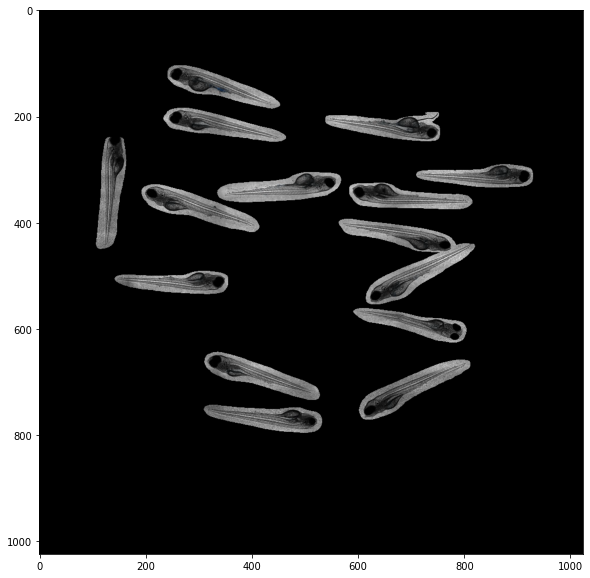

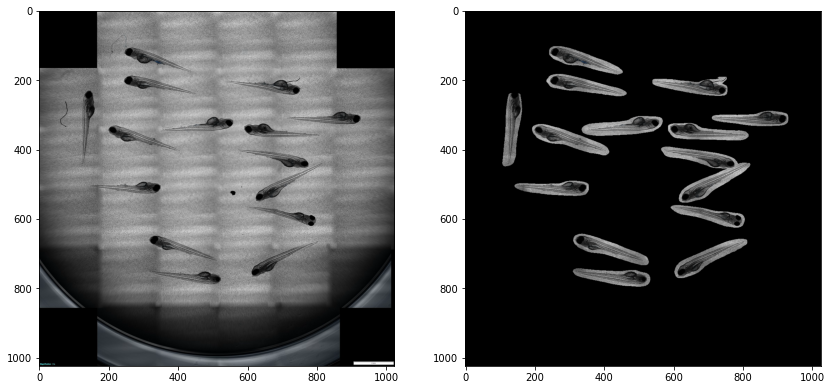

In [11]:
for image, prediction in zip(images, predictions):
    plot_prediction(image, prediction, cfg)
    plot_segementation(image, prediction)
    plot_segementation_vs_real(image, prediction)